<a href="https://colab.research.google.com/github/ThorbenJensen/traffic-cam/blob/master/yolo_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing YOLO and Python library ...

In [1]:
!echo "Downloading config files..."

!mkdir cfg
!wget -O cfg/coco.data https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/coco.data
!wget -O cfg/yolov3.cfg https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg

!echo "Modify config parameters to enable Testing mode"
!sed -i '/batch=64/c\# batch=64' cfg/yolov3.cfg
!sed -i '/subdivisions=16/c\# subdivisions=16' cfg/yolov3.cfg
!sed -i '/# batch=1/c\batch=1' cfg/yolov3.cfg
!sed -i '/# subdivisions=1/c\subdivisions=1' cfg/yolov3.cfg

!mkdir data
!wget -O data/coco.names https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

!echo "Downloading yolov3 weights"
!mkdir weights
!wget -O weights/yolov3.weights https://pjreddie.com/media/files/yolov3.weights

!pip install yolo34py

--2019-11-07 14:53:24--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/coco.data
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 183 [text/plain]
Saving to: ‘cfg/coco.data’

cfg/coco.data       100%[===================>]     183  --.-KB/s    in 0s      

2019-11-07 14:53:25 (21.1 MB/s) - ‘cfg/coco.data’ saved [183/183]

--2019-11-07 14:53:27--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘cfg/yolov3.cfg’

cfg/yolo

## Downloading an some images

In [35]:
# download 4 images with 0.2 frames per second (one image each 5 seconds)
!ffmpeg -i https://56f2a99952126.streamlock.net/833/default.stream/playlist.m3u8 -r 0.2 -vframes 4 image%03d.jpg

/bin/bash: NR_FRAMES: command not found
ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265

In [36]:
# downloading an image from github
!wget https://github.com/Informationsfabrik/traffic-cam/raw/master/data/shot0001.png

--2019-11-07 15:32:40--  https://github.com/Informationsfabrik/traffic-cam/raw/master/data/shot0001.png
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Informationsfabrik/traffic-cam/master/data/shot0001.png [following]
--2019-11-07 15:32:40--  https://raw.githubusercontent.com/Informationsfabrik/traffic-cam/master/data/shot0001.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2774124 (2.6M) [image/png]
Saving to: ‘shot0001.png.1’

shot0001.png.1      100%[===================>]   2.65M  --.-KB/s    in 0.06s   

2019-11-07 15:32:41 (45.7 MB/s) - ‘shot0001.png.1’ saved [2774124/2774124]



In [37]:
import cv2

img = cv2.imread('shot0001.png')
img.shape

(720, 1280, 3)

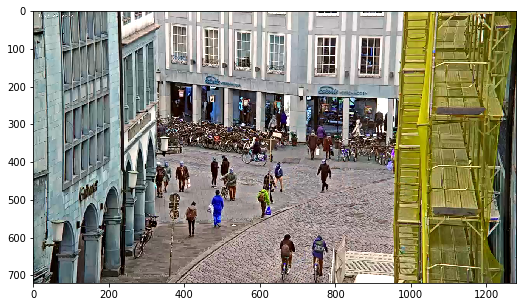

In [4]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [10, 5]
plt.imshow(img)

# Detecting objects in an image

In [0]:
from pydarknet import Detector, Image

net = Detector(bytes("cfg/yolov3.cfg", encoding="utf-8"),
               bytes("weights/yolov3.weights", encoding="utf-8"),
               0,
               bytes("cfg/coco.data",encoding="utf-8"))

In [6]:
from pprint import pprint

img_darknet = Image(img)
results = net.detect(img_darknet)
pprint(results)

[(b'person',
  0.9974312782287598,
  (771.2098388671875,
   435.3855285644531,
   41.448097229003906,
   90.31513977050781)),
 (b'person',
  0.9915117621421814,
  (485.68951416015625,
   524.0814208984375,
   44.24181365966797,
   106.49520874023438)),
 (b'person',
  0.9912858009338379,
  (419.23394775390625, 550.673828125, 30.72964859008789, 99.69127655029297)),
 (b'person',
  0.9910369515419006,
  (758.5015869140625,
   648.4071044921875,
   44.74913024902344,
   115.02522277832031)),
 (b'person',
  0.9878703951835632,
  (395.537841796875, 438.2724914550781, 35.91701889038086, 84.61866760253906)),
 (b'person',
  0.9873145818710327,
  (480.6180419921875,
   425.1214599609375,
   23.310535430908203,
   77.56414794921875)),
 (b'person',
  0.9803993105888367,
  (675.04833984375, 647.910400390625, 41.44316864013672, 109.3818359375)),
 (b'person',
  0.9757713675498962,
  (525.8212890625, 459.55535888671875, 33.67927932739258, 86.94586181640625)),
 (b'bicycle',
  0.9705790877342224,
  (582.

# Analyzing result of recognition:



In [7]:
print("What types of objects are seen on the image:")
set([i[0] for i in results])

What types of objects are seen on the image:


{b'backpack', b'bicycle', b'person'}

In [8]:
print("Number of spotted persons:") 
len([i[0] 
     for i in results 
     if i[0] == b'person'])

Number of spotted persons:


16

# Showing detections within image

In [9]:
result = results[0]
result

(b'person',
 0.9974312782287598,
 (771.2098388671875, 435.3855285644531, 41.448097229003906, 90.31513977050781))

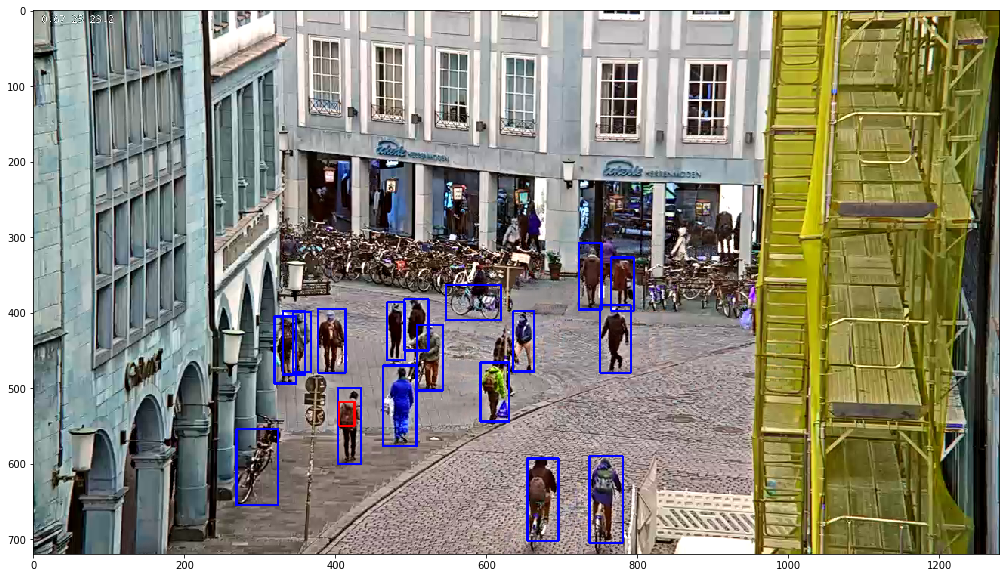

In [10]:
img2 = img.copy()

for category, score, bounds in results:
    x, y, w, h = bounds
    if category == b'backpack':
      color = (255, 0, 0)
    else:
      color = (0, 0, 255)
    cv2.rectangle(img2, 
                  (int(x - w / 2), int(y - h / 2)), (int(x + w / 2), int(y + h / 2)),
                  color,
                  thickness=2)

plt.rcParams['figure.figsize'] = [20, 10]
plt.imshow(img2)